In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
#让所有的变量或者声明都能显示出来
InteractiveShell.ast_node_interactivity = 'all'
#import mglearn

# 面对对象编程

## 基础知识

1. 类是抽象的模板，而实例是根据类创建出来的一个个具体的“对象”
2. 和静态语言不同，Python允许对实例变量绑定任何数据，也就是说，对于两个实例变量，虽然它们都是同一个类的不同实例，但拥有的变量名称都可能不同

### 数据封装——实例的方法访问实例的数据

In [2]:
class Student(object):

    def __init__(self, name, score):
        self.name = name
        self.score = score

    def print_score(self):
        print('%s: %s' % (self.name, self.score))

gy = Student('GouYue',99)
gy.print_score()

GouYue: 99


### 继承
* 好处：
    1. 子类获得了父类的全部方法；
    2. 子类可以覆盖父类的方法——多态

In [2]:
class Animal(object):
    def run(self):
        print('Animal is running...')
class Dog(Animal):
    pass
class Cat(Animal):

    def run(self):
        super().run()
        print('Cat is running...')
dog = Dog()
dog.run()

cat = Cat()
cat.run()


Animal is running...
Animal is running...
Cat is running...


### 多态

* 提高了代码的维护性(继承保证)
* 提高了代码的扩展性(由多态保证)

开闭原则：
* 对扩展开放（Open for extension）：允许子类重写方法函数
* 对修改封闭（Closed for modification）：不重写，直接继承父类方法函数

In [5]:
class Animal(object):
    def run(self):
        print('Animal is running...')
class Dog(Animal):

    def run(self):
        print('Dog is running...')

class Cat(Animal):

    def run(self):
        print('Cat is running...')
b = Animal() # b是Animal类型
c = Dog() # c是Dog类型
isinstance(b, Animal)
isinstance(b, Dog)
isinstance(c, Dog)
isinstance(c, Animal)

True

False

True

True

#### 动态语言的鸭子类型——Duck Typing

动态语言的“鸭子类型”，它并不要求严格的继承体系，一个对象只要“看起来像鸭子，走起路来像鸭子”，那它就可以被看做是鸭子。使用Duck Typing，我们根本不检查类型。相反，我们检查给定方法或属性的存在。

In [8]:
# Python program to demonstrate 
# duck typing 
  
  
class Bird: 
    def fly(self): 
        print("fly with wings") 
  
class Airplane: 
    def fly(self): 
        print("fly with fuel") 
  
class Fish: 
    def swim(self): 
        print("fish swim in sea") 
  
# Attributes having same name are 
# considered as duck typing 
for obj in Bird(), Airplane(), Fish(): 
    obj.fly() 

fly with wings
fly with fuel


AttributeError: 'Fish' object has no attribute 'fly'

In [7]:
class TheHobbit:
    def __len__(self):
        return 95022
the_hobbit = TheHobbit()
the_hobbit
len(the_hobbit)

my_str = "Hello World"
my_list = [34, 54, 65, 78]
my_dict = {"one": 123, "two": 456, "three": 789}
len(my_str)
len(my_list)
len(my_dict)
len(the_hobbit)

my_int = 7
my_float = 42.3
len(my_int)
len(my_float)

95022

11

4

3

95022

TypeError: object of type 'int' has no len()

### 获取实例的内部信息

#### 使用type()——判断实例类型

In [10]:
class Animal(object):
    def run(self):
        print('Animal is running...')
class Dog(Animal):

    def run(self):
        print('Dog is running...')

class Cat(Animal):

    def run(self):
        print('Cat is running...')
b = Animal() # b是Animal类型
c = Dog() # c是Dog类型
type(b)
type(c)


__main__.Animal

__main__.Dog

#### 使用isinstance()——还可以判断是否属于某父类

注意：总是优先使用isinstance()判断类型，可以将指定类型及其子类“一网打尽”。

In [13]:
class Animal(object):
    def run(self):
        print('Animal is running...')
class Dog(Animal):

    def run(self):
        print('Dog is running...')

class Cat(Animal):

    def run(self):
        print('Cat is running...')
b = Animal() # b是Animal类型
c = Dog() # c是Dog类型
isinstance(c, Dog)
isinstance(c, Animal)

True

True

#### 使用dir()——获得一个对象的所有属性和方法

In [12]:
class Animal(object):
    def run(self):
        print('Animal is running...')
a = Animal()
dir(a)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'run']

#### 操作实例的状态

* getattr(实例，'属性/方法'(字符串))：获取属性/方法xxx？
* setattr((实例，'属性/方法'(字符串)), 值)：设置一个属性/方法.
* hasattr(实例，'属性/方法'(字符串))：有属性/方法xxx吗？


In [14]:
class MyObject(object):
    def __init__(self):
        self.x = 9
    def power(self):
        return self.x * self.x
obj = MyObject()

hasattr(obj, 'x') # 有属性'x'吗？
obj.x
hasattr(obj, 'y') # 有属性'y'吗？
setattr(obj, 'y', 19) # 设置一个属性'y'
getattr(obj, 'y') # 获取属性'y'
obj.y # 获取属性'y'

True

9

False

19

19

通过内置的一系列函数，我们可以对任意一个Python对象进行剖析，拿到其内部的数据。要注意的是，只有在不知道对象信息的时候，我们才会去获取对象信息。如果可以直接写：

`sum = obj.x + obj.y`

就不要写：

`sum = getattr(obj, 'x') + getattr(obj, 'y')`

### 实例属性和类属性

**注意：千万不要对实例属性和类属性使用相同的名字，因为相同名称的实例属性将屏蔽掉类属性，但是当你删除实例属性后，再使用相同的名称，访问到的将是类属性。**

In [9]:
class Student(object):
    name = 'Student'#定义了一个类属性
    

s = Student() # 创建实例s
print(s.name) # 打印name属性，因为实例并没有name属性，所以会继续查找class的name属性

print(Student.name) # 打印类的name属性

s.name = 'Michael' # 给实例绑定name属性
print(s.name) # 由于实例属性优先级比类属性高，因此，它会屏蔽掉类的name属性

print(Student.name) # 但是类属性并未消失，用Student.name仍然可以访问

del s.name # 如果删除实例的name属性
print(s.name) # 再次调用s.name，由于实例的name属性没有找到，类的name属性就显示出来了


Student
Student
Michael
Student
Student


In [4]:
class RegressorMixin:
    """Mixin class for all regression estimators in scikit-learn."""
    _estimator_type = "regressor"
    __add = 'a'
    pass
class StackingRegressor(RegressorMixin,):
    pass
str = StackingRegressor()
str._estimator_type
str._RegressorMixin__add
str.__add

'regressor'

'a'

AttributeError: 'StackingRegressor' object has no attribute '__add'

### 使用__slots__——限制实例的属性
注意:\_\_slots\_\_定义的属性仅对当前类实例起作用，对继承的子类是不起作用的;除非在子类中也定义\_\_slots\_\_，这样，子类实例允许定义的属性就是自身的\_\_slots\_\_加上父类的\_\_slots\_\_。

In [17]:
class Student(object):
    __slots__ = ('name', 'age') # 用tuple定义允许绑定的属性名称
s = Student() # 创建新的实例
s.name = 'Michael' # 绑定属性'name'
s.age = 25 # 绑定属性'age'
# 由于'score'没有被放到__slots__中，所以不能绑定score属性，试图绑定score将得到AttributeError的错误。
s.score = 99 # 绑定属性'score'
    

AttributeError: 'Student' object has no attribute 'score'

In [18]:
class GraduateStudent(Student):
    pass

g = GraduateStudent()
g.score = 9999

### 使用@property——既能检查参数，又可以用类似属性这样简单的方式来访问类的变量

@property的实现比较复杂，我们先考察如何使用。把一个getter方法变成属性，只需要加上@property就可以了，此时，@property本身又创建了另一个装饰器@score.setter，负责把一个setter方法变成属性赋值，于是，我们就拥有一个可控的属性操作：

In [19]:
class Student(object):

    @property  # getter方法
    def score(self):
        return self._score

    @score.setter
    def score(self, value):
        if not isinstance(value, int):
            raise ValueError('score must be an integer!')
        if value < 0 or value > 100:
            raise ValueError('score must between 0 ~ 100!')
        self._score = value

@property的实现比较复杂，我们先考察如何使用。把一个getter方法变成属性，只需要加上@property就可以了，此时，@property本身又创建了另一个装饰器@score.setter，负责把一个setter方法变成属性赋值，于是，我们就拥有一个可控的属性操作：

In [21]:
s = Student()
s.score = 60 # OK，实际转化为s.set_score(60)
s.score # OK，实际转化为s.get_score()
s.score = 9999

60

ValueError: score must between 0 ~ 100!

还可以只给getter方法，不写setter方法，相当于对参数的写入保护

In [ ]:
class Student(object):

    @property  # getter方法
    def birth(self):
        return self._birth

    @birth.setter
    def birth(self, value):
        self._birth = value

    @property
    def age(self):
        return 2015 - self._birth

上面的birth是可读写属性，而age就是一个只读属性，因为age可以根据birth和当前时间计算出来。

### 多重继承——MixIn设计模式

一个主线类，多个从线（MixIn）。MixIn的目的就是给一个类增加多个功能，这样，在设计类的时候，我们优先考虑通过多重继承来组合多个MixIn的功能，而不是设计多层次的复杂的继承关系。只允许单一继承的语言（如Java）不能使用MixIn的设计。

In [23]:
class Dog(Mammal, RunnableMixIn, CarnivorousMixIn):
    pass

NameError: name 'Mammal' is not defined

这样一来，我们不需要复杂而庞大的继承链，只要选择组合不同的类的功能，就可以快速构造出所需的子类。

### 定制类

参考：[廖雪峰](https://www.liaoxuefeng.com/wiki/1016959663602400/1017590712115904)


#### \_\_str\_\_

#### \_\_iter\_\_

#### \_\_getitem\_\_

#### \_\_getattr\_\_

#### \_\_call\_\_

In [24]:
class Student(object):
    def __init__(self, name):
        self.name = name

    def __call__(self):
        print('My name is %s.' % self.name)
s = Student('Michael')
s() # self参数不要传入

My name is Michael.


In [26]:
type(Student)
type(type)

type

type

### super()
参考：Onenote

* 针对单继承
    
    在类的继承中，如果重定义某个方法，该方法会覆盖父类的同名方法，但有时，我们希望能同时实现父类的功能，这时，我们就需要调用父类的方法了，可通过super()来实现。
    
* 针对多继承：

    super实质上和父类没有关联!

MRO（method resolution order），事实上，对于你定义的每个类，python都会计算出一个方法解析顺序，它代表了类继承的顺序。我们可以利用下面的方式获得某个类的MRO列表。

Python3.x 和 Python2.x 的一个区别是: Python 3 可以使用直接使用 super().xxx 代替 super(Class, self).xxx :

#### 单继承

In [18]:
class Animal(object):
    def __init__(self, name):
        self.name = name

    def greet(self):
        print('the animal name is %s' % self.name)


class Dog(Animal):
    def greet(self):
        super().greet()
        print('wangwang')




In [19]:
dog = Dog('huang')
dog.greet()

the animal name is huang
wangwang


super一个常见的用法就是在子类中调用父类的初始化方法了，如：

In [2]:
class Base(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b


class Inherit(Base):
    def __init__(self, a, b, c):
        # super(Inherit, self).__init__(a, b) py2支持的写法
        super().__init__(a, b) # py3支持的写法
        self.c = c
        print(self.a)
        print(self.b)
        print(self.c)


test = Inherit('daocoder', 'mudai', 'dao')

daocoder
mudai
dao


#### super的真正原理——利用MRO列表

MRO（method resolution order），事实上，对于你定义的每个类，python都会计算出一个方法解析顺序，它代表了类继承的顺序。我们可以利用下面的方式获得某个类的MRO列表。

那么这个MRO列表的顺序是怎么定的呢，它是通过一个C3线性化算法来实现的，这里不讨论这个算法，简单来说，一个MRO列表就是合并所有父类的列表，并遵循下面几点：

* 子类永远在父类的前面。
* 如果有多个父类，会根据它们在列表中的顺序去检查。
* 如果对下一个类存在两种不同的合法选择，那么选择第一个父类。



In [21]:
class Base(object):
    def __init__(self):
        print('enter base')
        print('leave base')


class A(Base):
    def __init__(self):
        print('enter A')
        super(A, self).__init__()
        print('leave A')


class B(Base):
    def __init__(self):
        print('enter B')
        super(B, self).__init__()
        print('leave B')


class C(A, B):
    def __init__(self):
        print('enter C')
        super(C, self).__init__()
        print('leave C')

c = C()

enter C
enter A
enter B
enter base
leave base
leave B
leave A
leave C


In [22]:
print(C.mro())
print(C.__mro__)
print(c.__class__.mro())

[<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.Base'>, <class 'object'>]
(<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.Base'>, <class 'object'>)
[<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.Base'>, <class 'object'>]


super的工作原理如下：

In [ ]:
def super(cls, inst):
    """
    cls代表类，inst代表实例
    """
    mro = inst.__class__.mro()
    return mro[mro.index(cls) + 1]

可以看出上面的代码做了两件事：

1. 获取inst的MRO列表。
2. 查找cls在MRO的index，并返回它的下一个类，即mro[index + 1]

### 元类/元编程

# 装饰器



## \*args和**kwargs

注明：
1. \*args和\*\*kwargs这种写法不是必须的，只有前面的 \* 才是必须的。当然你也可以写成\*var和\*\*vars，而写成\*args和\*\*kwargs是一个约定俗成的一个命名规范而已。
2. 参数arg、\*args、\*\*kwargs三个参数的位置必须是一定的。必须是(arg,\*args,\*\*kwargs)这个顺序，否则程序会报错。

函数在实际执行时，编程人员无法预先知道会被传入多少实参，这是不确定量，函数知道使用者会传多少个参数给它，幸好Python有\*args和\*\*kwargs，有它俩帮我们统统接收。

<span class="mark">功能:是将**不确定**数量的参数传递给一个函数。注意是不确定的</span>。

**\*args的用法:*args 非键值对的可变数量的参数列表打包成tuple给函数体调用**

**\*\*kwargs的使用方法\*\*kwargs 打包关键字参数成dict给函数体调用**

In [11]:
def function(x,y,*args,**kwargs):
    print(x,y,args,kwargs)

function(6,7,8,9,a=1, b=2, c=3)

6 7 (8, 9) {'a': 1, 'b': 2, 'c': 3}


### 使用\*args和\*\*kwargs来传参

In [12]:
def test_args_kwargs(arg1, arg2, arg3):
   print("arg1:", arg1)
   print("arg2:", arg2)
   print("arg3:", arg3)
# 首先使用 *args
args = ("two", 3, 5)
test_args_kwargs(*args)

# 现在使用 **kwargs:
kwargs = {"arg3": 3, "arg2": "two", "arg1": 5}
test_args_kwargs(**kwargs)


arg1: two
arg2: 3
arg3: 5
arg1: 5
arg2: two
arg3: 3


## 闭包

闭包就是引用了自有变量的函数，这个函数保存了执行的上下文，可以脱离原本的作用域独立存在。

In [ ]:
# print_msg是外围函数
def print_msg():
    msg = "I'm closure"

    # printer是嵌套函数
    def printer():
        print(msg)

    return printer


# 这里获得的就是一个闭包
closure = print_msg()
# 输出 I'm closure
closure()

msg是一个局部变量，在print_msg函数执行之后应该就不会存在了。但是嵌套函数引用了这个变量，将这个局部变量封闭在了嵌套函数中，这样就形成了一个闭包。

## 第一个手动装饰器及存在的问题

In [3]:
def a_new_decorator(func):
    def WrapTheFunction():
        print('I am doing some boring work before executing {}'.format(func.__name__))
        func()
        print('I am doing some boring work after executing {}'.format(func.__name__))
        return
    return WrapTheFunction

def a_function_requiring_decoration():
    print("I am the function which needs some decoration to remove my foul smell")
    
a_function_requiring_decoration()


I am the function which needs some decoration to remove my foul smell


In [4]:
a_function_requiring_decoration = a_new_decorator(a_function_requiring_decoration)
a_function_requiring_decoration()

I am doing some boring work before executing a_function_requiring_decoration
I am the function which needs some decoration to remove my foul smell
I am doing some boring work after executing a_function_requiring_decoration


In [5]:
a_function_requiring_decoration.__name__

'WrapTheFunction'

#### 使用@装饰器函数
```
@装饰器函数
被包装函数()
```
==等价于执行==

```
新函数(name与被包装函数name一至) = 装饰器函数（被包装函数）

```

In [3]:
def a_new_decorator(func):
    def WrapTheFunction():
        print('I am doing some boring work before executing {}'.format(func.__name__))
        func()
        print('I am doing some boring work after executing {}'.format(func.__name__))
        return
    return WrapTheFunction
@a_new_decorator
def a_function_requiring_decoration():
    print("I am the function which needs some decoration to remove my foul smell")
    
a_function_requiring_decoration()
#the @a_new_decorator is just a short way of saying: a_function_requiring_decoration = a_new_decorator(a_function_requiring_decoration)

I am doing some boring work before executing a_function_requiring_decoration
I am the function which needs some decoration to remove my foul smell
I am doing some boring work after executing a_function_requiring_decoration


In [8]:
a_function_requiring_decoration.__name__

'WrapTheFunction'

#### Problem

1. 改变了原有函数的__name__等；
2. 针对被包装函数需要传参的情况没有考虑

## 针对保留原有函数的名字和注释文档做出的修改

@functools.wraps(func)，这是python提供的装饰器。它能把原函数的元信息拷贝到装饰器里面的 func 函数中。函数的元信息包括docstring、name、参数列表等等。

In [10]:
from functools import wraps

def a_new_decorator(func):
    @wraps(func)
    def wrapTheFunction():
        print('I am doing some boring work before executing {}'.format(func.__name__))
        func()
        print('I am doing some boring work after executing {}'.format(func.__name__))
        return
    return wrapTheFunction

@a_new_decorator
def a_function_requiring_decoration():
    print("I am the function which needs some decoration to remove my foul smell")
    
a_function_requiring_decoration.__name__

'a_function_requiring_decoration'

functools.wraps和update_wrapper有什么区别:
1. [中文](https://www.coder.work/article/341384)
2. [英文](https://stackoverflow.com/questions/15357776/what-is-the-difference-between-functools-wraps-and-update-wrapper)

## 针对被包装函数需要传参的修改

**问题再现**

In [12]:
from functools import wraps

def a_new_decorator(func):
    @wraps(func)
    def wrapTheFunction():
        print('I am doing some boring work before executing {}'.format(func.__name__))
        func()
        print('I am doing some boring work after executing {}'.format(func.__name__))
        return
    return wrapTheFunction

@a_new_decorator
def a_function_requiring_decoration(a):
    print("I am the function which needs some decoration to remove my foul smell")
    print(a)
    
a_function_requiring_decoration('haha')

TypeError: wrapTheFunction() takes 0 positional arguments but 1 was given

**解决方法**

In [46]:
from functools import wraps

def a_new_decorator(func):
    @wraps(func)
    def wrapTheFunction(*args, **kwargs):
        print('I am doing some boring work before executing {}'.format(func.__name__))
        func(*args, **kwargs)
        print('I am doing some boring work after executing {}'.format(func.__name__))
        return
    return wrapTheFunction

@a_new_decorator
def a_function_requiring_decoration(a):
    print("I am the function which needs some decoration to remove my foul smell")
    print(a)
a_function_requiring_decoration('haha')

I am doing some boring work before executing a_function_requiring_decoration
I am the function which needs some decoration to remove my foul smell
haha
I am doing some boring work after executing a_function_requiring_decoration


**`a_function_requiring_decoration('haha')`相当于`wrapTheFunction('haha')`,因为a_new_decorator return的是`wrapTheFunction`**

## 带参数的装饰器——在原来装饰器上再嵌套一个函数即可

In [19]:
from functools import wraps

def log_with_param(text):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            print('call {}'.format(func.__name__))
            print('args = {}'.format(*args))
            print('log_param = {}'.format(text))
            return func(*args, **kwargs)
        return wrapper
    return decorator

In [14]:
@log_with_param("param")
def test_with_param(a):
    print(test_with_param.__name__)
test_with_param('haha')

call test_with_param
args = haha
log_param = param
test_with_param


**相当于执行：**

In [20]:
def test_with_param(a):
    print(test_with_param.__name__)
    
# 传入装饰器的参数，并接收返回的decorator函数
decorator = log_with_param("param")
# 传入test_with_param函数
wrapper = decorator(test_with_param)
# 调用装饰器函数
wrapper("haha")

call test_with_param
args = haha
log_param = param
test_with_param


## 装饰器类——比嵌套函数的方式更加整洁

装饰器不仅可以是函数，还可以是类，相比函数装饰器，类装饰器具有灵活度大、高内聚、封装性等优点。使用类装饰器主要依靠类的\_\_call\_\_方法，当使用 @ 形式将装饰器附加到函数上时，就会调用此方法。

使用类装饰器可以直接依靠类内部的\_\_call\_\_方法来实现，当使用 @ 形式将类装饰器附加到函数上时，就会调用类装饰器的\_\_call\_\_方法。而不需要向函数装饰器那样，在装饰器函数中定义嵌套函数，来实现装饰功能。

In [37]:
from functools import wraps
import time

class Foo():
    def __init__(self, func):    # 初始化函数中传入函数对象的参数
        wraps(func)(self)
        #self._func = func
    def __call__(self,*args, **kwargs):    # 定义__call__方法，直接实现装饰功能
        start_time = time.time()
        #self._func()
        self.__wrapped__(*args, **kwargs)
        end_time = time.time()
        print('花费了 %.2f' % (end_time - start_time))
 
@Foo  # bar=Foo(bar)
def bar():
    print('bar函数的执行时间为：')
    time.sleep(2.5) 
    
bar()    # bar=Foo(bar)()，没有嵌套关系了,直接执行Foo的 __call__方法，实现装饰功能   


bar函数的执行时间为：
花费了 2.52


## 装饰器顺序
```
@a
@b
@c
def f ():
    pass
```
它的执行顺序是从里到外，最先调用最里层的装饰器，最后调用最外层的装饰器，它等效于

    f = a(b(c(f)))

In [26]:
from functools import update_wrapper
from operator import attrgetter
class _IffHasAttrDescriptor:
    def __init__(self, fn, delegate_names, attribute_name):
        self.fn = fn
        self.delegate_names = delegate_names
        self.attribute_name = attribute_name
        # update the docstring of the descriptor
        update_wrapper(self, fn)

    def __get__(self, obj, type=None):
        print(obj)
        # lambda, but not partial, allows help() to work with update_wrapper
        out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
        # update the docstring of the returned function
        print(out)
        update_wrapper(out, self.fn)
        print(out)
        return out
def if_delegate_has_method(delegate):
    if isinstance(delegate, list):
        delegate = tuple(delegate)
    if not isinstance(delegate, tuple):
        delegate = (delegate,)
    return lambda fn: _IffHasAttrDescriptor(fn, delegate,
                                            attribute_name=fn.__name__)
class GY():
    
    @if_delegate_has_method(delegate='final_estimator_')
    def predict_proba(self,a):
        print(a)
    
gy = GY()
gy.predict_proba(1)

TypeError: '_IffHasAttrDescriptor' object is not callable

In [24]:
out = lambda *args, **kwargs: gy.predict_proba( *args, **kwargs)

## 参考文档

1. https://www.runoob.com/w3cnote/python-func-decorators.html
2. https://www.jianshu.com/p/ee82b941772a
3. https://python3-cookbook.readthedocs.io/zh_CN/latest/c09/p10_apply_decorators_to_class_and_static_methods.html
4. (类装饰器最简单讲解)[https://www.cnblogs.com/wgbo/archive/2018/11/13/9953446.html]

装饰器这一语法体现了Python中函数是第一公民，函数是对象、是变量，可以作为参数、可以是返回值，非常的灵活与强大。

## 常用的装饰器

### @abstractmethod——抽象方法

1. 抽象方法表示基类的一个方法，没有实现，所以**基类不能实例化**，**子类实现了该抽象方法才能被实例化**。Python的abc提供了@abstractmethod装饰器实现抽象方法
2. 在Python3.4中，声明抽象基类最简单的方式是子类话abc.ABC；Python3.0到Python3.3，必须在class语句中使用metaclass=ABCMeta；Python2中使用\_\_metaclass\_\_=ABCMeta

没有继承ABC或者ABCMeta：

In [39]:
from abc import ABCMeta,abstractmethod

class AbstractClass(object):
    # the metaclass attribute must always be set as a class variable

   # the abstractmethod decorator registers this method as undefined
   @abstractmethod
   def virtual_method_subclasses_must_define(self):
       # Can be left completely blank, or a base implementation can be provided
       # Note that ordinarily a blank interpretation implicitly returns `None`,
       # but by registering, this behaviour is no longer enforced.
       return
class Subclass(AbstractClass):
    def haha(self):
        return
sb = Subclass()

继承ABC或者ABCMeta：

In [30]:
from abc import ABCMeta,abstractmethod

class AbstractClass(object,metaclass=ABCMeta):
    # the metaclass attribute must always be set as a class variable

   # the abstractmethod decorator registers this method as undefined
   @abstractmethod
   def virtual_method_subclasses_must_define(self):
       # Can be left completely blank, or a base implementation can be provided
       # Note that ordinarily a blank interpretation implicitly returns `None`,
       # but by registering, this behaviour is no longer enforced.
       return
class Subclass(AbstractClass):
    def ha(self):
        return
sb = AbstractClass()

TypeError: Can't instantiate abstract class AbstractClass with abstract methods virtual_method_subclasses_must_define

In [36]:
from abc import ABCMeta,abstractmethod

class AbstractClass(object,metaclass=ABCMeta):
    # the metaclass attribute must always be set as a class variable

   # the abstractmethod decorator registers this method as undefined
   @abstractmethod
   def virtual_method_subclasses_must_define(self):
       # Can be left completely blank, or a base implementation can be provided
       # Note that ordinarily a blank interpretation implicitly returns `None`,
       # but by registering, this behaviour is no longer enforced.
       return
class Subclass(AbstractClass):
    def virtual_method_subclasses_must_define(self):
        return
sb = Subclass()

#### metaclass=ABCMeta (python3)与 \_\_metaclass\_\_=ABCMeta (python2)的区别：
参考：https://www.cnblogs.com/idontknowthisperson/p/10090012.html

* **Python3.4 以上实现方法：**

```python
from abc import ABC, abstractmethod

class Foo(ABC):
    @abstractmethod
    def fun(self):
        '''please Implemente in subclass'''


class SubFoo(Foo):
    def fun(self):
        print('fun in SubFoo')

a = SubFoo()
a.fun()
```

* **Python3 以上实现方法：**

```python
from abc import abstractmethod, ABCMeta

class Bar(metaclass=ABCMeta):
    @abstractmethod
    def fun(self):
        '''please Implemente in subclass'''


class SubBar(Bar):
    def fun(self):
        print('fun in SubBar')


b = SubBar()
b.fun()
```

* **Python2 实现方法：**

```python
from abc import ABCMeta, abstractmethod


class FooBar():
    __metaclass__ = ABCMeta
    @abstractmethod
    def fun(self):
         '''please Implemente in subclass'''
       
         
class SubFooBar(FooBar):
    def fun(self):
        print('fun in SubFooBar')
        
a = SubFooBar()
a.fun()
```

### @staticmethod——静态方法
使用@staticmethod或@classmethod，就可以不需要实例化，直接类名.方法名()来调用。
这有利于组织代码，把某些应该属于某个类的函数给放到那个类里去，同时有利于命名空间的整洁。

* 静态方法是独立于类的一个单独函数，只是寄存在一个类名下。
* @staticmethod不需要表示自身对象的self和自身类的cls参数，就跟使用函数一样。
* 如果需要调用带self的方法，必须得先对类进行实例化。

参考：https://blog.csdn.net/u010571844/article/details/50728991

In [42]:
class Test(object):
    name = 'stephen'

    """docstring for Test"""
    def __init__(self, arg=None):
        super(Test, self).__init__()
        self.arg = arg

    def say_hi(self):
        print('[1]hello wrold')

    @staticmethod
    def say_bad():
        print('[2]say bad')
        print('[3]Test.name:%s'%Test.name)  # 不需要实例化
        Test().say_hi() # 先要实例化，才能调用say_hi()

    @classmethod
    def say_good(cls):
        print('[4]say good')
        print( '[5]cls.name:%s'%cls.name) # 不需要实例化
        cls.say_bad() #不需要实例化
        cls().say_hi()  #先要实例化，才能调用say_hi()
        
Test.say_bad() # OK
say_bad() # NameError

[2]say bad
[3]Test.name:stephen
[1]hello wrold


NameError: name 'say_bad' is not defined

### @classmethod——类方法
使用@staticmethod或@classmethod，就可以不需要实例化，直接类名.方法名()来调用。
这有利于组织代码，把某些应该属于某个类的函数给放到那个类里去，同时有利于命名空间的整洁。

* 类方法是将类本身作为操作对象，可以用过类属性的一些初始化操作。
* @classmethod也不需要self参数，但第一个参数需要是表示自身类的cls参数。
* @classmethod因为持有cls参数，可以来调用类的属性，类的方法，实例化对象等，避免硬编码。
* 如果需要调用带self的方法，必须得先对类进行实例化。
* 该函数只能访问到类的数据属性，不能获取实例的数据属性

参考：https://blog.csdn.net/u010571844/article/details/50728991

In [43]:
class Test(object):
    name = 'stephen'

    """docstring for Test"""
    def __init__(self, arg=None):
        super(Test, self).__init__()
        self.arg = arg

    def say_hi(self):
        print('[1]hello wrold')

    @staticmethod
    def say_bad():
        print('[2]say bad')
        print('[3]Test.name:%s'%Test.name)  # 不需要实例化
        Test().say_hi() # 先要实例化，才能调用say_hi()

    @classmethod
    def say_good(cls):
        print('[4]say good')
        print( '[5]cls.name:%s'%cls.name) # 不需要实例化,可以直接访问类属性
        cls.say_bad() #不需要实例化，可以直接访问类方法
        cls().say_hi()  #先要实例化，才能调用say_hi()
Test.say_good()



[4]say good
[5]cls.name:stephen
[2]say bad
[3]Test.name:stephen
[1]hello wrold
[1]hello wrold


In [44]:
gy = Test('haha')
gy.say_good()

[4]say good
[5]cls.name:stephen
[2]say bad
[3]Test.name:stephen
[1]hello wrold
[1]hello wrold


注：从源码角度来理解静态方法和类方法

* 静态方法相当于不自动传入实例对象作为方法的第一个参数，类方法相当于将默认传入的第一个参数由实例改为类
* 使用@classmethod后无论类调用还是实例调用，都会自动转入类作为第一个参数，不用手动传入就可以调用类属性，而没有@classmethod的需要手动传入类
* 既不用@classmethod也不用@staticmethod则类调用时不会自动传入参数，实例调用时自动传入实例作为第一个参数
* 所以说加@classmethod是为了更方便调用类属性，加@staticmethod是为了防止自动传入的实例的干扰
* 除此之外要说明一点：当属性和方法重名时，调用会自动访问属性，是因为这些方法调用的描述器都是非资料描述器。而当我们使用@property装饰器后，自动调用的就是新定义的get set方法，是因为@property装饰器是资料描述器

### @property——见本文档1.1.7

### @deprecated——弃用类/函数的说明

In [3]:
from sklearn.utils import deprecated

@deprecated("操你妈")
def some_function(): 
    pass

some_function()

D:\1-Anaconda3\envs\tf2.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function some_function is deprecated; 操你妈
  warnings.warn(msg, category=FutureWarning)


# 描述器

参考：
1. [Python描述器详解](https://www.cnblogs.com/JetpropelledSnake/p/8953988.html)

## 引入描述器的原因

我们可以用@property装饰器将方法包装成属性，这样的属性，相比于其他属性有一个优点就是可以在对属性赋值时，进行变量检查，当我们有很多这样的属性时，如果每一个都去使用@property，代码就会过于冗余。因为每一次检验的方法都是一样的，所以最好有方法可以批量实现这件事，只写一次if isinstance。描述器就可以用来实现这件事。

In [27]:
class A:
    def __init__(self, name, score, age):
        self.name = name # 普通属性
        self._score = score
        self._age = age
        
    @property
    def score(self):
        return self._score
    
    @score.setter
    def score(self, value):
        print('setting score here')
        if isinstance(value, int):
            self._score = value
        else:
            print('please input an int')
            
    @property
    def age(self):
        return self._age
    
    @age.setter
    def age(self, value):
        print('setting age here')
        if isinstance(value, int):
            self._age = value
        else:
            print('please input an int')
            
a = A('Bob', 90, 20)

## 描述器基本理论及简单实例
描述器功能强大，应用广泛，它可以控制我们访问属性、方法的行为，是**@property、super、静态方法、类方法、甚至属性、实例**背后的实现机制，是一种比较底层的设计，因此理解起来也会有一些困难。

定义：从描述器的创建来说，一个类中定义了\_\_get\_\_、\_\_set\_\_、\_\_delete\_\_中的一个或几个，这个类的实例就可以叫做一个描述器。

**创建一个描述器的类，它的实例就是一个描述器,这种类是当做工具使用的，不单独使用:**

In [42]:
class M:
    def __init__(self, x=1):
        print('M instance x = {}'.format(x))
        self.x = x
        
    def __get__(self, instance, owner):
        """ 访问描述器类的实例——即描述器的话，自动触发描述器的__get__方法
        instance：调用描述器的类的实例
        owner：调用描述器的类
        """
        print(instance)
        print(owner)
        return self.x
    
    def __set__(self, instance, value):
        """修改设置描述器的话，就自动触发描述器的__set__方法        
        instance：调用描述器的类的实例
        valuea: 
        """
        print(instance)
        self.x = value
        
# 调用描述器的类
class AA:
    m = M(3) # m就是一个描述器
    



M instance x = 3


In [43]:
aa = AA()
aa.m # 1 #触发了__get__方法
aa.m = 2 #触发了__set__方法
aa.m # 2

<class '__main__.AA'>


3

<class '__main__.AA'>


2

下面我们来说一下，当我们调用aa.m时的访问顺序：

* 程序会先查找 aa.\_\_dict\_\_['m'] 是否存在
* 不存在再到type(aa).\_\_dict\_\_['m']中查找
* 然后找type(aa)的父类
* 期间找到的是普通值就输出，如果找到的是一个描述器，则调用\_\_get\_\_方法

进一步思考：当访问一个属性时，我们可以不直接给一个值，而是接一个描述器，让访问和修改设置时自动调用\_\_get\_\_方法和\_\_set\_\_方法。再在\_\_get\_\_方法和\_\_set\_\_方法中进行某种处理，就可以实现更改操作属性行为的目的。这就是描述器做的事情。

## \_\_get\_\_和\_\_set\_\_方法中的参数解释

* `descr.__get__(self, obj, type=None) --> value`
* `descr.__set__(self, obj, value) --> None`
* `descr.__delete__(self, obj) --> None `


* self是描述器类中的实例
* obj是调用描述器的类的实例
* type是调用描述器的类
* value是对这个属性赋值时传入的值

In [ ]:
class M:
    def __init__(self, name):
        self.name = name
        
    def __get__(self, obj, type):
        print('get第一个参数self: ', self.name)
        print('get第二个参数obj: ', obj.age)
        print('get第三个参数type: ', type.name)
        
    def __set__(self, obj, value):
        obj.__dict__[self.name] = value
        
class A:
    name = 'Bob'
    m = M('age')
    def __init__(self, age):
        self.age = age

a = A(20) # age是20
a.m
# get第一个参数self:  age
# get第二个参数obj:  20
# get第三个参数type:  Bob
a.m = 30
a.age # 30

## 描述器的调用机制

### 实例属性的查找过程——__dict__方法

__dict__方法返回的是一个字典，类和实例都可以调用__dict__，键就是类或实例所拥有的属性、方法，可以用这个字典访问属性，但是方法就不能这样直接访问。

In [4]:
class C:
    x = 1
    def __init__(self, y):
        self.y = y       
    def fun(self):
        print(self.y)
        
c = C(2)

# 实例有哪些属性
print(c.__dict__) 

# 类有什么属性
print(C.__dict__) 
print(type(c).__dict__) # 和上一条一样

# 调用属性
c.fun() # 2
c.__dict__['y'] # 和上一条一样

# 调用方法
type(c).__dict__['fun']() # 报错，说明函数不是这么调用的

{'y': 2}
{'__module__': '__main__', 'x': 1, '__init__': <function C.__init__ at 0x00000151D52A0168>, 'fun': <function C.fun at 0x00000151D52A01F8>, '__dict__': <attribute '__dict__' of 'C' objects>, '__weakref__': <attribute '__weakref__' of 'C' objects>, '__doc__': None}
{'__module__': '__main__', 'x': 1, '__init__': <function C.__init__ at 0x00000151D52A0168>, 'fun': <function C.fun at 0x00000151D52A01F8>, '__dict__': <attribute '__dict__' of 'C' objects>, '__weakref__': <attribute '__weakref__' of 'C' objects>, '__doc__': None}
2


2

TypeError: fun() missing 1 required positional argument: 'self'

In [5]:
class M:
    def __init__(self):
        self.x = 1        
    def __get__(self, instance, owner):
        return self.x
    def __set__(self, instance, value):
        self.x = value
        
# 调用描述器的类
class AA:
    m = M() # m就是一个描述器
    n = 2
    def __init__(self, score):
        self.score = score
    
        
aa = AA(3)
print('-'*20)
print(aa.__dict__) # {'score': 3}
print(aa.score) # 3, 在 aa.__dict__ 中寻找，找到了score直接返回
print(aa.__dict__['score']) # 上面的调用机制实际上是这样的
print('-'*20)
print(type(aa).__dict__) # 里面有n和m
print(aa.n) # 2, 在aa.__dict__中找不到n，于是到type(aa).__dict__中找到了n，并返回其值
print(type(aa).__dict__['n']) # 其实是上面一条的调用机制
print('-'*20)
print(aa.m) # 1, 在aa.__dict__中找不到n，于是到type(aa).__dict__中找到了m
# m是一个描述器对象，于是调用__get__方法，将self.x的值返回，即1
print(type(aa).__dict__['m'].__get__(aa,AA)) # 1, 上面一条的调用方式是这样的
# __get__的定义中，除了self，还有instance和owner，其实分别表示的就是描述器所在的实例和类，这里的细节我们后文会讲

print('-'*20)
print(AA.m) # 1, 也是一样调用了描述器
print(AA.__dict__['m'].__get__(None, AA)) # 类相当于调用这个

--------------------
{'score': 3}
3
3
--------------------
{'__module__': '__main__', 'm': <__main__.M object at 0x00000151D5348F08>, 'n': 2, '__init__': <function AA.__init__ at 0x00000151D5346B88>, '__dict__': <attribute '__dict__' of 'AA' objects>, '__weakref__': <attribute '__weakref__' of 'AA' objects>, '__doc__': None}
2
2
--------------------
1
1
--------------------
1
1


### 资料描述器&非资料描述器

* 同时定义了\_\_get\_\_和\_\_set\_\_方法的描述器称为**资料描述器**
* 只定义了\_\_get\_\_的描述器称为**非资料描述器**
* 二者的区别是：当属性名和描述器名相同时，在访问这个同名属性时，如果是**资料描述器就会先访问描述器**，如果是**非资料描述器就会先访问属性** 举例如下:


In [7]:
class M:
    """
    既有__get__又有__set__，是一个资料描述器
    """
    def __init__(self):
        self.x = 1
        
    def __get__(self, instance, owner):
        print('get m here') # 打印一些信息，看这个方法何时被调用
        return self.x
    
    def __set__(self, instance, value):
        print('set m here') # 打印一些信息，看这个方法何时被调用
        self.x = value + 1 # 这里设置一个+1来更清楚了解调用机制

class N:
    """
    只有__get__是一个非资料描述器
    """
    def __init__(self):
        self.x = 1
        
    def __get__(self, instance, owner):
        print('get n here') # 打印一些信息，看这个方法何时被调用
        return self.x
        
# 调用描述器的类
class AA:
    m = M() # m就是一个描述器
    n = N()
    def __init__(self, m, n):
        self.m = m # 属性m和描述器m名字相同，调用时发生一些冲突
        self.n = n # 非资料描述器的情况，与m对比
    
aa = AA(2,5)
print(aa.__dict__) # 只有n没有m, 因为资料描述器同名时，不会访问到属性，会直接访问描述器，所以属性里就查不到m这个属性了
print(AA.__dict__) # m和n都有
print(aa.n) # 5, 非资料描述器同名时调用的是属性，为传入的5
print(AA.n) # 1, 如果是类来访问，就调用的是描述器，返回self.x的值

print(aa.m) # 3, 其实在aa=AA(2,5)创建实例时，进行了属性赋值，其中相当于进行了aa.m=2
# 但是aa调用m时却不是常规地调用属性m，而是资料描述器m
# 所以定义实例aa时，其实触发了m的__set__方法，将2传给value，self.x变成3
# aa.m调用时也访问的是描述器，返回self.x即3的结果
# 其实看打印信息也能看出什么时候调用了__get__和__set__

aa.m = 6 # 另外对属性赋值也是调用了m的__set__方法
print(aa.m) # 7，调用__get__方法

print('-'*20)
# 在代码中显式调用__get__方法
print(AA.__dict__['n'].__get__(None, AA)) # 1
print(AA.__dict__['n'].__get__(aa, AA)) # 1

set m here
{'n': 5}
{'__module__': '__main__', 'm': <__main__.M object at 0x00000151D535E748>, 'n': <__main__.N object at 0x00000151D535E8C8>, '__init__': <function AA.__init__ at 0x00000151D534BB88>, '__dict__': <attribute '__dict__' of 'AA' objects>, '__weakref__': <attribute '__weakref__' of 'AA' objects>, '__doc__': None}
5
get n here
1
get m here
3
set m here
get m here
7
--------------------
get n here
1
get n here
1


注：要想制作一个只读的资料描述器，需要同时定义\_\_set\_\_ 和 \_\_get\_\_,并在 \_\_set\_\_ 中引发一个 AttributeError 异常。定义一个引发异常的 \_\_set\_\_ 方法就足够让一个描述器成为资料描述器。

### 描述器的细节调用

当调用一个属性，而属性指向一个描述器时，为什么就会去调用这个描述器呢，其实这是由object.\_\_getattribute\_\_()方法控制的，其中object是新式类定义时默认继承的类，即py2这么写的class(object)中的object。新定义的一个类继承了object类，也就继承了\_\_getattribute\_\_方法。当访问一个属性比如b.x时，会自动调用这个方法 \_\_getattribute\_\_()的定义如下:

In [8]:
def __getattribute__(self, key):
    "Emulate type_getattro() in Objects/typeobject.c"
    v = object.__getattribute__(self, key)
    if hasattr(v, '__get__'):
        return v.__get__(None, self)
    return v

上面的定义显示，如果b.x是一个描述器对象，即能找到\_\_get\_\_方法，则会调用这个get方法，否则就使用普通的属性。 如果在一个类中重写\_\_getattribute\_\_，将会改变描述器的行为，甚至将描述器这一功能关闭。

## 实例方法、静态方法和类方法的描述器原理

访问些方法其实都访问的是描述器

In [2]:
class B:
    @classmethod
    def classmethod_print(cls):
        print('Bob')
        
    @staticmethod
    def staticmethod_print():
        print('my name is bob')
        
    def normal_print(self):
        print('this name')
        
b = B()
b.classmethod_print() # 调用类方法
b.staticmethod_print() # 调用静态方法
b.normal_print() # 调用实例方法
print(B.__dict__) # 里面有实例方法、静态方法和类方法

Bob
my name is bob
this name
{'__module__': '__main__', 'classmethod_print': <classmethod object at 0x00000168D5496108>, 'staticmethod_print': <staticmethod object at 0x00000168D5E7D2C8>, 'normal_print': <function B.normal_print at 0x00000168D5ACFAF8>, '__dict__': <attribute '__dict__' of 'B' objects>, '__weakref__': <attribute '__weakref__' of 'B' objects>, '__doc__': None}


In [5]:
print('-'*40)
print('类方法：')
print(B.__dict__['classmethod_print'])
print(b.classmethod_print) # 和上不一样
print('-'*40)
print('静态方法：')
print(B.__dict__['staticmethod_print'])
print(b.staticmethod_print) # 和上不一样
print('-'*40)
print('实例方法：')
print(B.__dict__['normal_print'])
print(b.normal_print) # 和上不一样

----------------------------------------
类方法：
<bound method B.classmethod_print of <class '__main__.B'>>
----------------------------------------
静态方法：
<function B.staticmethod_print at 0x00000168D5ACF3A8>
----------------------------------------
实例方法：
<function B.normal_print at 0x00000168D5ACFAF8>
<bound method B.normal_print of <__main__.B object at 0x00000168D5496608>>


* 实例直接调用时，类方法和实例方法都是bound method，而静态方法是function。因为静态方法本身就是定义在类里面的函数，所以不属于方法范畴；
* 由于实例直接调用后得到的结果可以直接接一个括号，当成函数来调用。而使用字典调用时，得到的结果和实例调用都不一样，所以它们是不可以直接接括号当成函数使用的。
* 静态方法和类方法用字典调用得到的其实分别是staticmethod和classmethod两个类的对象，这两个类其实是定义描述器的类，所以用字典访问的两个方法得到的都是描述器对象。它们需要用一个\_\_get\_\_方法才可以在后面接括号当成函数调用。
* 普通实例方法用字典调用得到的是一个function即函数，理论上是可以用括号直接调用的，但是调用时报错说少了self参数，其实它也是描述器对象，用通过\_\_get\_\_方法将self传入来调用

In [6]:
B.__dict__['classmethod_print'].__get__(None, B)()
B.__dict__['staticmethod_print'].__get__(None, B)()
B.__dict__['normal_print'].__get__(b, B)() # 相当于执行 b.normal_print()


Bob
my name is bob
this name


* 前两个\_\_get\_\_的第一个参数都是None，而实例方法是一个b，这是因为实例方法需要具体的实例来调用而不能用类直接调用。

In [7]:
print(B.__dict__['classmethod_print'].__get__(None, B))
print(B.__dict__['staticmethod_print'].__get__(None, B))

print(B.__dict__['normal_print'])
print(B.__dict__['normal_print'].__get__(None, B)) # 这是不传入实例即self的情况，和直接从字典调用结果相同，在python2中是一个unbound method
print(B.__dict__['normal_print'].__get__(b, B))

# B.print_name() # 报错，说少输入一个self参数
# B.print_name(B()) # this name  输入实例即不会报错

<bound method B.classmethod_print of <class '__main__.B'>>
<function B.staticmethod_print at 0x00000168D5ACF3A8>
<function B.normal_print at 0x00000168D5ACFAF8>
<function B.normal_print at 0x00000168D5ACFAF8>
<bound method B.normal_print of <__main__.B object at 0x00000168D5496608>>


### classmethod这个描述器的类

python中这些类的定义是用底层的C语言实现的，为了理解其工作原理，这里展示一个用python语言实现classmethod装饰器的方法，（来源），即构建能产生类方法对应描述器对象的类。

In [14]:
class myclassmethod(object):
    def __init__(self, method):
        self.method = method
    def __get__(self, instance, cls):
        return lambda *args, **kw: self.method(cls, *args, **kw)
    
class Myclass:
    x = 3
    @myclassmethod
    def method(cls, a):
        print(cls.x+a)
        
m = Myclass()
Myclass.method(a=2)

5


执行过程：

1. 我们看到使用@myclassmethod装饰器达到的效果和使用@classmethod装饰器没有什么区别
2. 首先定义了myclassmethod类，里面使用了\_\_get\_\_方法，所以它的**实例**会是一个描述器对象
3. 将myclassmethod当做装饰器作用于method函数，根据装饰器的知识，相当于这样设置method=myclassmethod(method)
4. 调用Myclass.method()时调用了改变后了的method方法，即相当于**myclassmethod(method)(a)**
5. myclassmethod(method)这是myclassmethod类的一个实例，即一个描述器，此处访问于是调用\_\_get\_\_方法，返回一个匿名函数；
6. \_\_get\_\_中其实是将cls部分传入method方法，因为method在Myclass类中调用，这个owner也就是Myclass类。这一步其实是提前传入了method的第一个参数cls，后面的参数a由myclassmethod(method)(a)第二个括号调用
7. 仔细分析上面的定义与调用过程，我们会发现，我们常常说的**类方法**第一个参数要是cls，其实是不对的，第一个参数是任意都可以，它只是占第一个位置，用于接收类实例引用类属性，随便换成任意变量都可以，用cls只是约定俗成的。比如下面的代码正常运行

In [8]:
class Myclass:
    x = 3
    @classmethod
    def method(b, a):
        print(b.x+a)
        
m = Myclass()
Myclass.method(a=2) # 5


5


### staticmethod类的等价python定义

In [12]:
class mystaticmethod:
    def __init__(self, fn):
        """
        fn: Myclass.method
        """
        print(fn)
        self.fn = fn
    def __get__(self, obj, type=None):
        """
        obj: 调用mystaticmethod描述器的实例
        type: 调用mystaticmethod描述器的实例的类
        """
        print(obj)
        print(type)
        return self.fn
    
class Myclass:
    x = 3
    @mystaticmethod
    def method(a, b):
        print(a + b)
        
m = Myclass()
m.method(a=2, b=3)

<function Myclass.method at 0x00000168D5EA54C8>
<class '__main__.Myclass'>
5


执行过程：

1. 静态方法相当于不自动传入实例对象作为方法的第一个参数
2. 首先定义了mystaticmethod类，里面使用了\_\_get\_\_方法，所以它的实例会是一个描述器对象
3. 将mystaticmethod当做装饰器作用于method函数，根据装饰器的知识，相当于这样设置method=mystaticmethod(method)
4. 调用m.method()时调用了改变后了的method方法，即相当于**mystaticmethod(method)(a,b)**
5. mystaticmethod(method)这是mystaticmethod类的一个实例，即一个描述器，此处访问于是调用\_\_get\_\_方法，返回函数；
6. 后面的参数a和b由mystaticmethod(method)(a,b)第二个括号调用

In [6]:
class M:
    def __init__(self):
        self.x = 1
        
    def __get__(self, instance, owner):
        return self.x
    
    def __set__(self, instance, value):
        self.x = value
# 调用描述器的类
class AA:
    m = M() # m就是一个描述器
    n = 2
    def __init__(self, score):
        self.score = score
a = AA(2)
type(a.m)

int

In [8]:
def fn(*args, **kwargs):
    print('fn')
out = lambda *args, **kwargs: fn(*args, **kwargs)
out(1)

fn


In [12]:
class C:
    x = 1
    def __init__(self, y):
        self.y = y
        
    def fun(self):
        print(self.y)
        
c = C(2)
c.__dict__
C.__dict__

{'y': 2}

mappingproxy({'__module__': '__main__',
              'x': 1,
              '__init__': <function __main__.C.__init__(self, y)>,
              'fun': <function __main__.C.fun(self)>,
              '__dict__': <attribute '__dict__' of 'C' objects>,
              '__weakref__': <attribute '__weakref__' of 'C' objects>,
              '__doc__': None})

In [16]:
type(c).__dict__

mappingproxy({'__module__': '__main__',
              'x': 1,
              '__init__': <function __main__.C.__init__(self, y)>,
              'fun': <function __main__.C.fun(self)>,
              '__dict__': <attribute '__dict__' of 'C' objects>,
              '__weakref__': <attribute '__weakref__' of 'C' objects>,
              '__doc__': None})

# operator模块

## attrgetter()

功能：取任意实例上的属性
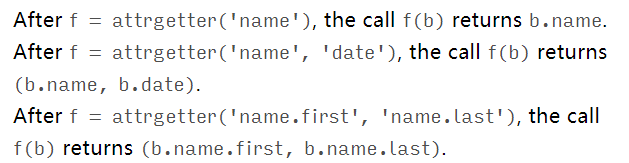

In [10]:
import operator
class C:
    def __init__(self, a, b):
        self.a = a
        self.b = b

c = C(1, 2)

getter = operator.attrgetter("a")
print (getter(c))


getter = operator.attrgetter("a", "b")
print (getter(c))

1
(1, 2)


In [42]:
estimators = [('lr','gy'),('svr', 'LinearSVR(random_state=42)')]
name,dw = zip(*estimators)
name
dw

('lr', 'svr')

('gy', 'LinearSVR(random_state=42)')

In [44]:
from joblib import Parallel, delayed
def bar():
    print('bar函数的执行时间为：')
    time.sleep(2.5) 
delayed(bar)

<function __main__.bar()>

In [52]:
from math import sqrt
from joblib import Parallel, delayed
[delayed(sqrt)(i ** 2) for i in range(10)]

[(<function math.sqrt(x, /)>, (0,), {}),
 (<function math.sqrt(x, /)>, (1,), {}),
 (<function math.sqrt(x, /)>, (4,), {}),
 (<function math.sqrt(x, /)>, (9,), {}),
 (<function math.sqrt(x, /)>, (16,), {}),
 (<function math.sqrt(x, /)>, (25,), {}),
 (<function math.sqrt(x, /)>, (36,), {}),
 (<function math.sqrt(x, /)>, (49,), {}),
 (<function math.sqrt(x, /)>, (64,), {}),
 (<function math.sqrt(x, /)>, (81,), {})]

# Pythonic Ways

## Role of Underscore(_) in Python

参考:
* [Role of Underscore(_) in Python](https://www.datacamp.com/community/tutorials/role-underscore-python?from=timeline&isappinstalled=0#name)

### 命名使用下划线'_'

下划线（_）可用于命名变量，函数和类等。

* **Single Pre Underscore:\- \_variable**
* **Signle Post Underscore:\- variable\_**
* **Double Pre Underscores:\- \_\_variable**
* **Double Pre and Post Underscores:\- \_\_variable\_\_**

#### \_variable

单个前下划线用于内部使用。**但是单个pre下划线并不会阻止你访问单个pre下划线变量。**

In [11]:
class Test:

    def __init__(self):
        self.name = "datacamp"
        self._num = 7

obj = Test()
print(obj.name)
print(obj._num)

datacamp
7


**但是，单个前置下划线会影响从模块导入的名称**
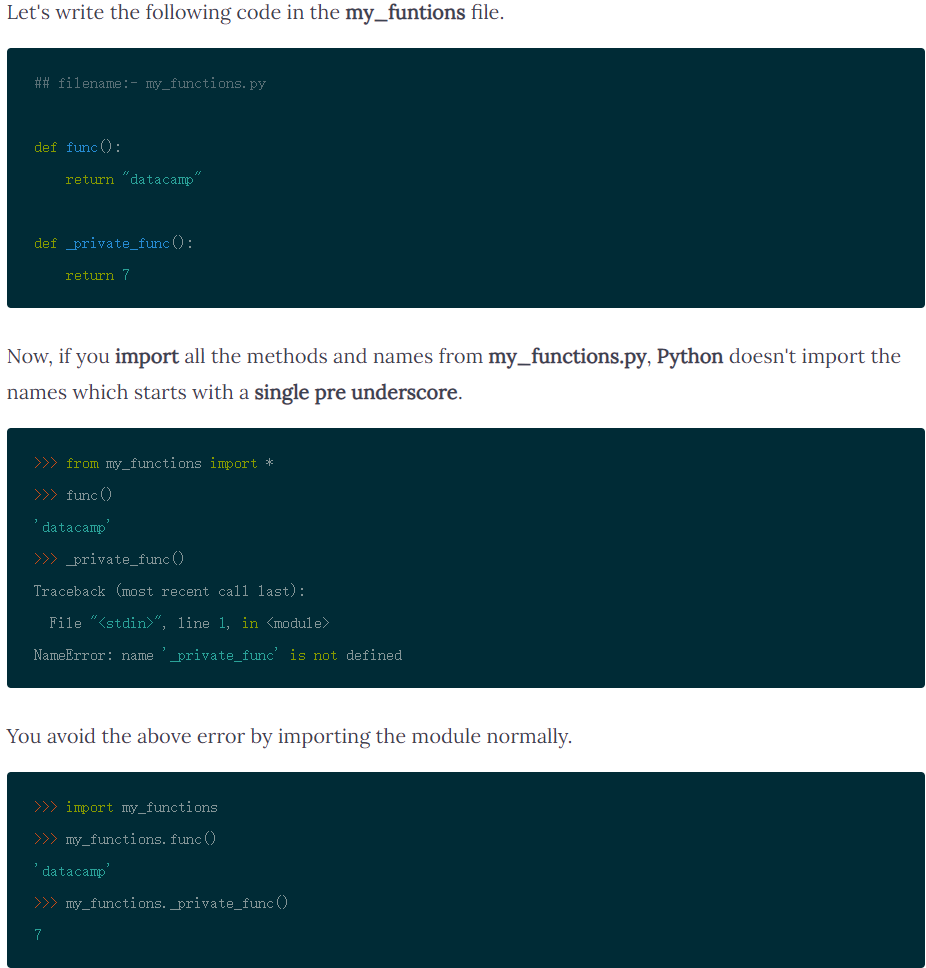

#### variable_

有时候，如果您想使用Python关键字作为变量、函数或类名，您可以使用variable_。您可以通过在要使用的名称的末尾添加下划线来避免与Python关键字冲突。

In [13]:
def function(class):
    pass

SyntaxError: invalid syntax (<ipython-input-13-5f959271564f>, line 1)

In [14]:
def function(class_):
    pass

#### __variable——声明私有变量的第二种方法

通常用在类里面，将变量（**属性、方法**）的名字进行修改。也叫name mangling

##### 用在私有属性上

In [15]:
class Sample():

    def __init__(self):
        self.a = 1
        self._b = 2
        self.__c = 3
obj1 = Sample()
dir(obj1)

['_Sample__c',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_b',
 'a']

让我们通过**继承Sample类**来创建另一个类，看看重写是如何工作的。

In [3]:
class Sample():

    def __init__(self):
        self.a = 1
        self._b = 2
        self.__c = 3
class SecondClass(Sample):

    def __init__(self):
        # super().__init__()
        self.a = "overridden"
        self._b = "overridden"
        self.__c = "overridden"
        
    def print_c(self,):
        print(self.__c)
obj2 = SecondClass()
print(obj2.a)
print(obj2._b)
obj2.print_c()#*********** 当前实例下的__c属性
print(obj2.__c) # obj2._SecondClass__c

overridden
overridden
overridden


AttributeError: 'SecondClass' object has no attribute '__c'

In [4]:
print(obj2._SecondClass__c)
print(obj2._Sample__c)
print(obj1._Sample__c)

overridden


AttributeError: 'SecondClass' object has no attribute '_Sample__c'

##### 用在私有方法上

In [5]:
class SimpleClass:

    def __datacamp(self):
        return "datacamp"

    def call_datacamp(self):
        return self.__datacamp()

obj = SimpleClass()
print(obj.call_datacamp()) ## same as above it returns the Dobule pre underscore method
print(obj.__datacamp())    ## we get an error here

datacamp


AttributeError: 'SimpleClass' object has no attribute '__datacamp'

Let's look at the name mangling in another way. First, we will create a variable with name **\_SimpleClass\_\_name**, and then we will try to access that variable using Doble Pre Underscore name.

In [6]:
_SimpleClass__name = "datacamp"

class SimpleClass:

    def return_name(self):
        return __name

obj = SimpleClass()
print(obj.return_name()) ## it prints the __name variable

datacamp


#### \_\_variable\_\_

它们被称为**魔术方法**或**dunder方法**。

* 如果使用这些方法作为变量名，则会导致冲突。所以，最好远离他们。

### 单一下划线的用法

#### 在Ipython中

Python自动将解释器中最后一个表达式的值存储到一个名为“_”的特定变量中。如果需要，还可以将这些值分配给另一个变量。

In [6]:
5 + 4
_

9

9

In [7]:
_ + 6
_

15

15

#### 将后面代码不会用到的值赋值给'_'

In [8]:
## ignoring a value
a, _, b = (1, 2, 3) # a = 1, b = 3
print(a, b)

## ignoring multiple values
## *(variable) used to assign multiple value to a variable as list while unpacking
## it's called "Extended Unpacking", only available in Python 3.x
a, *_, b = (7, 6, 5, 4, 3, 2, 1)
print(a, b)

1 3
7 1


#### 用在循环中作为循环变量



In [9]:
## lopping ten times using _
for _ in range(5):
    print(_)

## iterating over a list using _
## you can use _ same as a variable
languages = ["Python", "JS", "PHP", "Java"]
for _ in languages:
    print(_)

_ = 5
while _ < 10:
    print(_, end = ' ') # default value of 'end' id '\n' in python. we're changing it to space
    _ += 1

0
1
2
3
4
Python
JS
PHP
Java
5 6 7 8 9 

#### 分隔数字

If you have a long digits number, you can separate the group of digits as you like for better understanding.

Ex:- million = 1_000_000

Next, you can also use underscore(_) to separate the binary, octal or hex parts of numbers.

Ex:- binary = 0b_0010, octa = 0o_64, hexa = 0x_23_ab

Execute all the above examples to see the results.

In [10]:
## different number systems
## you can also check whether they are correct or not by coverting them into integer using "int" method
million = 1_000_000
binary = 0b_0010
octa = 0o_64
hexa = 0x_23_ab

print(million)
print(binary)
print(octa)
print(hexa)

1000000
2
52
9131


# 迭代器

* 迭代是Python最强大的功能之一，是访问集合元素的一种方式。

* 迭代器是一个可以记住遍历的位置的对象。

* 迭代器对象从集合的第一个元素开始访问，直到所有的元素被访问完结束。迭代器只能往前不会后退。


## 字符串，列表或元组对象都可用于创建迭代器

字符串，列表或元组对象都可用于创建迭代器：

迭代器有两个基本的方法：iter() 和 next()。

In [1]:
list=[1,2,3,4]
it = iter(list)    # 创建迭代器对象
print (next(it))   # 输出迭代器的下一个元素

print (next(it))

1
2


迭代器对象可以使用常规for语句进行遍历：

In [2]:
list=[1,2,3,4]
it = iter(list)    # 创建迭代器对象
for x in it:
    print(x)

1
2
3
4


也可以使用 next() 函数：

In [ ]:
import sys         # 引入 sys 模块
 
list=[1,2,3,4]
it = iter(list)    # 创建迭代器对象
 
while True:
    try:
        print (next(it))
    except StopIteration:
        pass
        #sys.exit()

## 把一个类作为一个迭代器

使用需要在类中实现两个方法 __iter__() 与 __next__() 。


* \_\_iter\_\_() 方法返回一个特殊的迭代器对象， 这个迭代器对象实现了 __next__() 方法并通过 `StopIteration` 异常标识迭代的完成。

* \_\_next\_\_() 方法（Python 2 里是 next()）会返回下一个迭代器对象。



创建一个返回数字的迭代器，初始值为 1，逐步递增 1：

In [6]:
class MyNumbers:
  def __iter__(self):
    self.a = 1
    return self
 
  def __next__(self):
    x = self.a
    self.a += 1
    return x
 
myclass = MyNumbers()
myiter = iter(myclass)
 
print(next(myiter))
print(next(myiter))
print(next(myiter))
print(next(myiter))
print(next(myiter))

1
2
3
4
5


**StopIteration**
StopIteration 异常用于标识迭代的完成，防止出现无限循环的情况，在 __next__() 方法中我们可以设置在完成指定循环次数后触发 StopIteration 异常来结束迭代。

In [7]:
class MyNumbers:
  def __iter__(self):
    self.a = 1
    return self
 
  def __next__(self):
    if self.a <= 20:
      x = self.a
      self.a += 1
      return x
    else:
      raise StopIteration
 
myclass = MyNumbers()
myiter = iter(myclass)
 
for x in myiter:
  print(x)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


### `__getitem__`方法

Python的魔法方法`__getitem__` 可以让对象实现迭代功能，这样就可以使用`for...in...` 来迭代该对象了

在用 for..in.. 迭代对象时，如果对象没有实现 `__iter__ `,`__next__` 迭代器协议，Python的解释器就会去寻找\_\_getitem\_\_ 来迭代对象，如果连\_\_getitem\_\_ 都没有定义，这解释器就会报对象不是迭代器的错误：

> `TypeError: 'Animal' object is not iterable`

In [12]:
class Animal():
    
    def __init__(self, animal_list):
        self.animal_list = animal_list
        
    def __getitem__(self, index):
        return self.animal_list[index]

animals = Animal(["dog","cat","fish"])
for animal in animals:
    print(animal)

dog
cat
fish


使用这个方法最大的印象就是调用对象的属性可以像字典取值一样使用中括号['key']。使用中括号对对象中的属性进行取值、赋值或者删除时，会自动触发对应的`__getitem__`、`__setitem__`、`__delitem__`方法:

[参考](https://www.jb51.net/article/168915.htm)
[参考](https://blog.csdn.net/weixin_42557907/article/details/81589574)

# 生成器
在 Python 中，使用了 yield 的函数被称为生成器（generator）。

跟普通函数不同的是，**生成器是一个返回迭代器的函数**，只能用于迭代操作，**更简单点理解生成器就是一个迭代器。**

在调用生成器运行的过程中，每次遇到 `yield` 时函数会暂停并保存当前所有的运行信息，返回 `yield` 的值, 并在下一次执行 `next() `方法时从当前位置继续运行。

调用一个生成器函数，返回的是一个迭代器对象。

以下实例使用 yield 实现斐波那契数列：

In [1]:
import sys
 
def fibonacci(n): # 生成器函数 - 斐波那契
    a, b, counter = 0, 1, 0
    while True:
        if (counter > n): 
            return
        yield (a,b)
        a, b = b, a + b
        counter += 1
f = fibonacci(10) # f 是一个迭代器，由生成器返回生成
dict(f)
# while True:
#     try:
#         print (next(f), end=" ")
#     except StopIteration:
#         pass
#         #sys.exit()

{0: 1, 1: 2, 2: 3, 3: 5, 5: 8, 8: 13, 13: 21, 21: 34, 34: 55, 55: 89}